In [1]:
import os
from IPython.display import Image 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()

In [3]:
print(cwd)

/Users/manulabricole/Documents/CDN/Math pour l_informatique


# Theorie

## Definition

### Généralités

--> Une transformée de Fourrier est une **fonction** (continue) qui permet de décomposer un signal **périodique** f(t) (continue) en ses composantes fréquentielles principales. Elle transforme la fonction f(t) en F(t) qui met en valeur ses différentes fréquences

--> L'idée est de décomposer la fonction f(t) comme une somme de signaux.

--> Les signaux sont des fonctions périodiques avec pour paramètre : L'amplitude ainsi que sa fréquence

--> La transformée de Fourrier permet de détecter les fréquences principales du signal de base

### Expression 

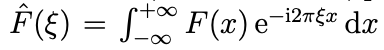

In [4]:
Image(filename=os.path.join(cwd, "images/expression.png"))

- F^ est la transformée de Fourrier du signal F(x)

- $\epsilon$ est la fréquence du signal. Dans le cadre d'une **image $\epsilon$ sera un vecteur (x, y) dans le plan**. Dans le cadre d'un signal sonore, la fréquence est une fréquence temporelle a une dimension.

- x represents la variable de l'espace étudier. Dans le cadre d'un signal **sonore, x sera le temps (t)**

- F(f) permet finalement de **passer d'une fonction f(t) du temps, en une fonction F($\omega$) de la fréquence**

## Deux types de Transformation de Fourrier

### Transformée de Fourier continue (TFC)

La TFC est utilisée pour analyser des signaux continus dans le domaine du temps. Elle transforme une fonction continue du temps en une fonction continue de la fréquence. La formule mathématique de la transformée de Fourier continue d'une fonction f(t) est donnée par :

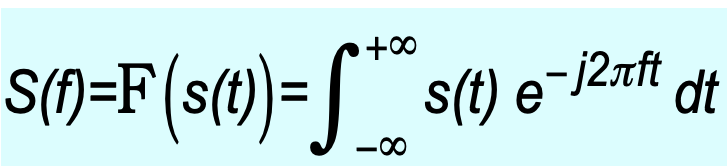

In [5]:
Image(filename=os.path.join(cwd, "images/continue.png"))

### Transformée de Fourier discrète (TFD) 

La TFD est utilisée pour analyser des signaux échantillonnés dans le domaine du temps, tels que des séries temporelles numériques. Elle transforme une séquence finie de N échantillons en une séquence de N valeurs complexes dans le domaine de la fréquence. La formule mathématique de la transformée de Fourier discrète d'une séquence x[n] est donnée par :

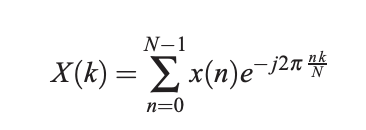

In [6]:
Image(filename=os.path.join(cwd, "images/discrete.png"))

## Critère de Shannon

- Le critère de Shannon-Nyquist est utilisé dans le traitement de signal sonore.
 

- Pour garantir un traitement de bonne qualité, un critère sur la fréquence d'échantillonage est nécessaire
 

- Pour être certain de capter l'intégralité des informations il faut échantilloner le signal avec la fréquence du critère : 
 
 
- ** $F_e$ > 2* $F_m$


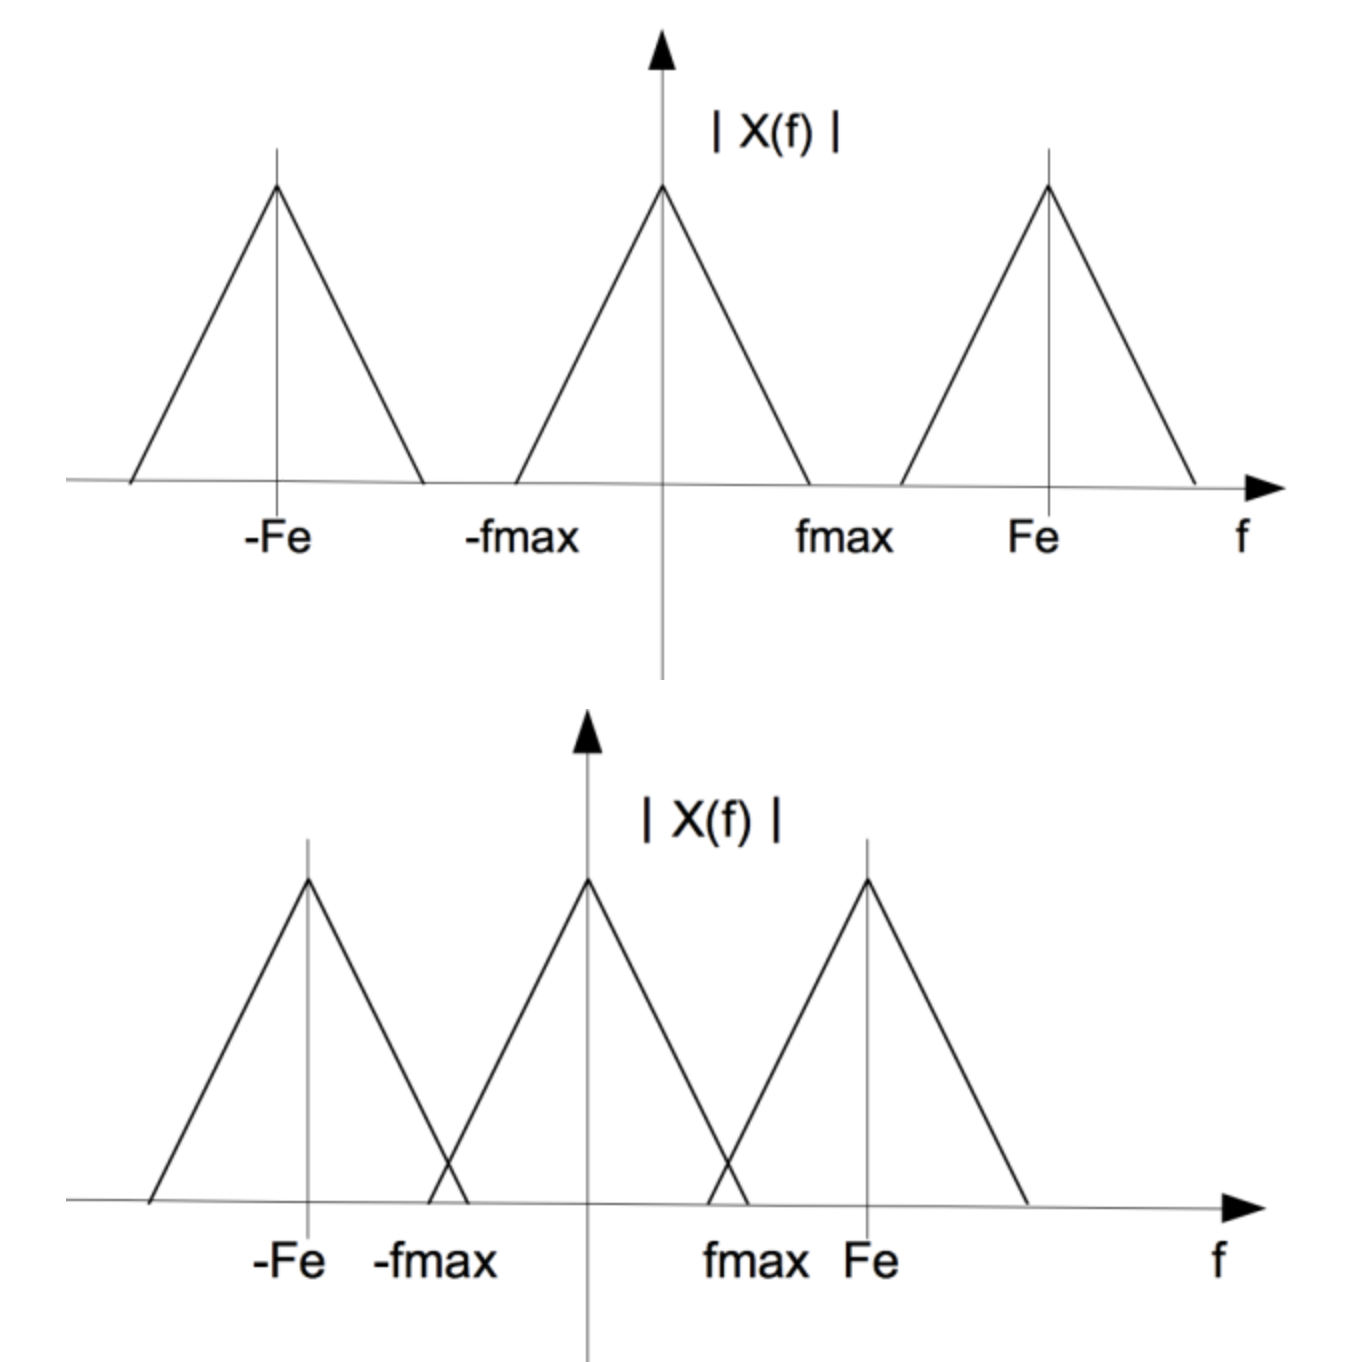

In [7]:
Image(filename=os.path.join(cwd, "images/shannon.png"))

# Code

### Signals

In [8]:
class Signal:
    def __init__(self, signal_type='sinusoidal', frequency=1.0, amplitude=1.0, duration=1.0, sampling_rate=1000):
        self.signal_type = signal_type
        self.frequency = frequency
        self.amplitude = amplitude
        self.duration = duration
        self.sampling_rate = sampling_rate

    def __repr__(self):
        return f"Frequency = {self.frequency} - Amplitude = {self.amplitude} - Duration = {self.duration} - Sampling_rate = {self.sampling_rate}"

    def generate_signal(self):
        t = np.linspace(0, self.duration, int(self.duration * self.sampling_rate), endpoint=False)
        if self.signal_type == 'sinusoidal':
            signal = self.amplitude * np.sin(2 * np.pi * self.frequency * t)
        else:
            raise ValueError("Unsupported signal type. Available types: 'sinusoidal', 'square', 'sawtooth'")
        return t, signal

    def add_signal(self, other_signal):
        if not isinstance(other_signal, Signal):
            raise ValueError("Input must be a Signal object.")

        # Ensure both signals have the same duration and sampling rate
        if self.duration != other_signal.duration or self.sampling_rate != other_signal.sampling_rate:
            raise ValueError("Both signals must have the same duration and sampling rate.")

        # Generate signals
        time, signal1 = self.generate_signal()
        _, signal2 = other_signal.generate_signal()

        # Add the two signals together to create a new signal
        combined_signal = signal1 + signal2

        return time, combined_signal

    def plot_signal(self, color='blue'):
        time, signal = self.generate_signal()
        plt.plot(time, signal, linestyle='-', label=f'Signal - {self.frequency} Hz', color=color)        

In [9]:
signal_1 = Signal(frequency=0.1, amplitude=2, duration=10, sampling_rate=10)

### Superposed sinusoide

In [10]:
def generate_combined_signal(frequencies, amplitudes, duration=1.0, sampling_rate=1000):
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    combined_signal = np.zeros_like(t)

    unique_signals = {}

    for idx, freq in enumerate(frequencies):
        amplitude = amplitudes[idx]  # Vous pouvez ajuster l'amplitude pour chaque fréquence ici si nécessaire
        signal = amplitude * np.sin(2 * np.pi * freq * t)

        key = f"signals_freq_{freq}"
        unique_signals[key] = Signal(
            signal_type="sinusoidal",
            frequency=freq,
            amplitude=amplitude,
            duration=duration,
            sampling_rate=sampling_rate
        )
        
        combined_signal += signal

    return t, combined_signal, unique_signals


def plot_sum_signals(signals_dict):
    # Set the size of the figure to 12x8 inches
    plt.figure(figsize=(12, 8))

    # Generate the combined signal by adding all individual signals together
    combined_signal = np.zeros_like(list(signals_dict.values())[0].generate_signal()[1])
    for signal_obj in signals_dict.values():
        _, signal = signal_obj.generate_signal()
        combined_signal += signal

    # Plot the combined signal on a separate graph
    plt.plot(_, combined_signal, linestyle='-', label='Combined Signal', color='purple')

    # Add labels, title, and legend for the combined signal
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Combined Signal')
    plt.grid()
    plt.legend()

    plt.show()

def plot_superposed_signals(signals_dict, colors=None):
    # Set the size of the figure to 12x8 inches
    plt.figure(figsize=(12, 8))

    # Create a list of colors if not provided
    if colors is None:
        colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']

    # Plot all the individual signals on the same graph with colors from the list
    for i, (signal_name, signal_obj) in enumerate(signals_dict.items()):
        color = colors[i % len(colors)]  # Pick a color from the list based on the iteration index
        signal_obj.plot_signal(color=color)

    # Add labels, title, and legend
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Superposed Signals')
    plt.grid()
    plt.legend()

    plt.show()

#### Inputs 

In [61]:
frequency_list = [1, 5, 0.8, 0.31, 0.11, 0.0005, 20]
amplitude_list = [1, 2, 5, 0.1, 1, 2, 1]
duration=10.0
sampling_rate=1000

In [62]:
t, combined_signal, unique_signals = generate_combined_signal(
    frequencies=frequency_list,
    amplitudes=amplitude_list,
    duration=duration, 
    sampling_rate=sampling_rate
)

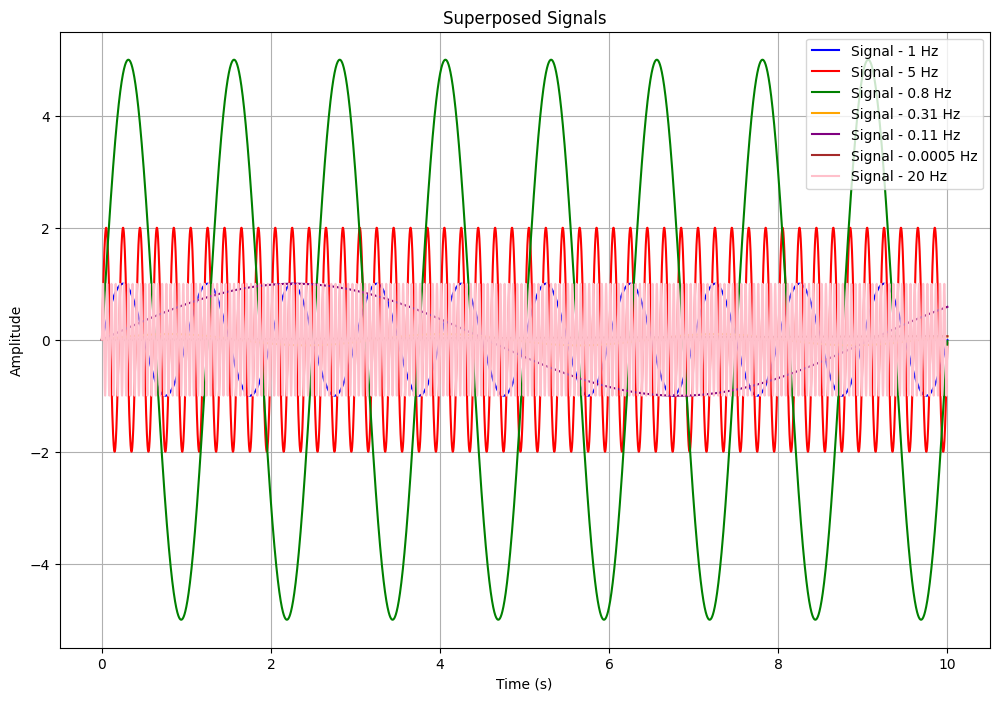

In [63]:
plot_superposed_signals(unique_signals)

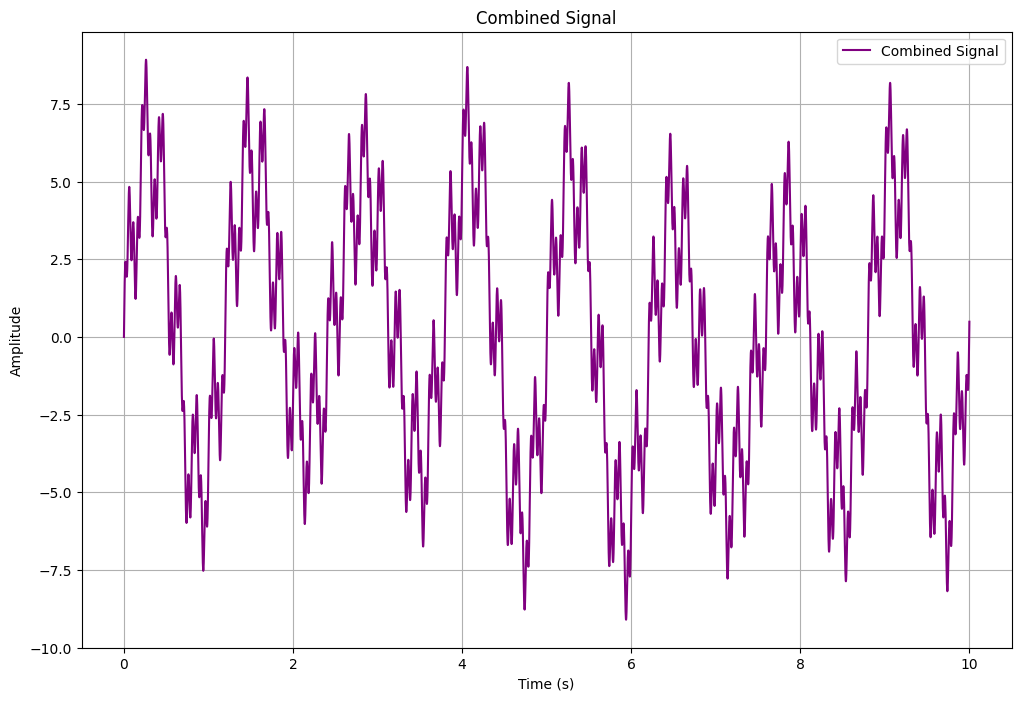

In [64]:
plot_sum_signals(signals_dict=unique_signals)

### Fourrier Decomposition

In [65]:
def compute_fourier_decomposition(time, signal, sampling_rate):
    n = len(signal)
    frequencies = np.fft.fftfreq(n, 1 / sampling_rate)
    positive_frequencies = frequencies[:n // 2]
    fft_result = np.zeros(n // 2, dtype=complex)
    
    for k in range(n // 2):
        print(f"Computing frequency : {k}")
        for i in range(n):
            fft_result[k] += signal[i] * np.exp(-2j * np.pi * k * i / n) * 2 / n
    
    return positive_frequencies, fft_result

In [66]:
time, signal, unique_signals = generate_combined_signal(
    frequencies=frequency_list,
    amplitudes=amplitude_list,
    duration=duration, 
    sampling_rate=sampling_rate
)

In [67]:
positive_frequencies, fft_result = compute_fourier_decomposition(time=time, signal=signal, sampling_rate=sampling_rate)

Computing frequency : 0
Computing frequency : 1
Computing frequency : 2
Computing frequency : 3
Computing frequency : 4
Computing frequency : 5
Computing frequency : 6
Computing frequency : 7
Computing frequency : 8
Computing frequency : 9
Computing frequency : 10
Computing frequency : 11
Computing frequency : 12
Computing frequency : 13
Computing frequency : 14
Computing frequency : 15
Computing frequency : 16
Computing frequency : 17
Computing frequency : 18
Computing frequency : 19
Computing frequency : 20
Computing frequency : 21
Computing frequency : 22
Computing frequency : 23
Computing frequency : 24
Computing frequency : 25
Computing frequency : 26
Computing frequency : 27
Computing frequency : 28
Computing frequency : 29
Computing frequency : 30
Computing frequency : 31
Computing frequency : 32
Computing frequency : 33
Computing frequency : 34
Computing frequency : 35
Computing frequency : 36
Computing frequency : 37
Computing frequency : 38
Computing frequency : 39
Computing 

In [73]:
max_amp = max(np.abs(fft_result))
max_amp

4.970910828048226

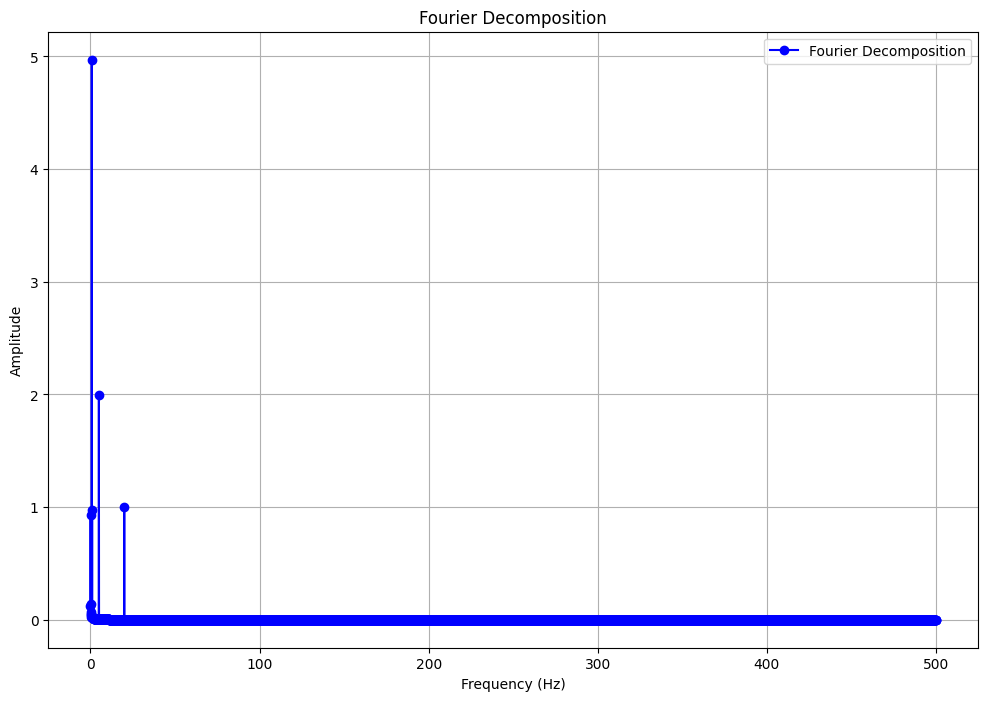

In [68]:
# Plot the Fourier decomposition
plt.figure(figsize=(12, 8))
plt.plot(positive_frequencies, np.abs(fft_result), linestyle='-', marker='o', label='Fourier Decomposition', color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Decomposition')
plt.grid()
plt.legend()
plt.show()

### Re-build signal from Fourrier

In [69]:
def reconstruct_signal(positive_frequencies, fft_result, duration, sampling_rate):
    n = len(fft_result)
    combined_signal = np.zeros(n)

    for k, freq in enumerate(positive_frequencies):
        amplitude = np.abs(fft_result[k])  # The amplitude of the frequency component
        phase_angle = np.angle(fft_result[k])  # The phase angle of the frequency component

        # Reconstruct the individual frequency component
        frequency_component = amplitude * np.exp(1j * phase_angle) * np.exp(2j * np.pi * freq * np.linspace(0, duration, n))

        # Add the frequency component to the combined signal
        combined_signal += frequency_component.real

    return np.linspace(0, duration, n), combined_signal


In [70]:
# Reconstruct the signal from the Fourier decomposition
reconstructed_t, reconstructed_signal = reconstruct_signal(positive_frequencies, fft_result, duration, sampling_rate)

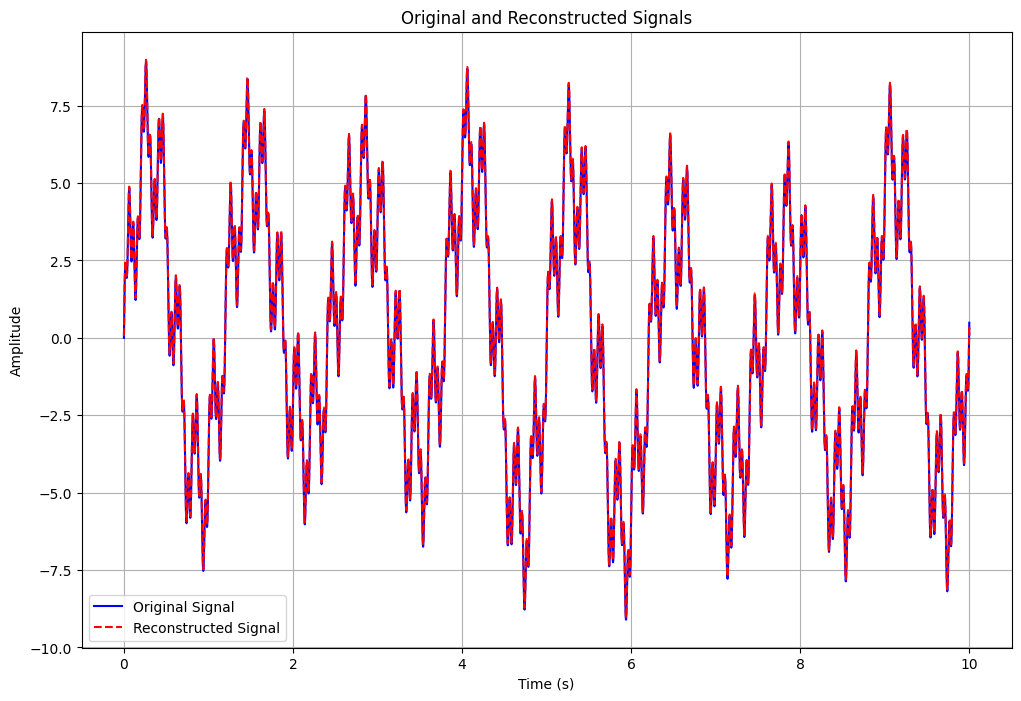

In [71]:
# Plot the original and reconstructed signals
plt.figure(figsize=(12, 8))
plt.plot(t, signal, label='Original Signal', color='blue')
plt.plot(reconstructed_t, reconstructed_signal, label='Reconstructed Signal', linestyle='--', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original and Reconstructed Signals')
plt.grid()
plt.legend()